# Testing Significance


## The Blind Experiment

Let's suppose we conducted a study where we invited 100 volunteers and split them into 2 even groups randomly:

* Group A was given a placebo, or fake, pill and instructed to consume it on a daily basis.
* Group B was given the actual weight loss pill and instructed to consume it on a daily basis.

The lists weight_lost_a and weight_lost_b contain the amount of weight (in pounds) that the participants in each group lost. 

In [8]:
weight_lost_a = [3, 2, 3, 4, 3, 2, 2, 2, 1, 3, 2, 3, 1, 3, 4, 1, 3,
                 2, 1, 3, 4, 3, 2, 3, 7, 2, 3, 2, 5, 1, 1, 1, 3, 2,
                 4, 10, 2, 3, 2, 5, 6, 2, 3, 2, 3, 4, 1, 3, 3, 1]
weight_lost_b = [5,  4, 5, 5, 4, 5, 7, 5, 4, 3, 3, 5, 10, 3, 4, 9, 
                 7, 6, 9, 4, 2, 5, 7, 7, 7, 5, 4, 8, 9, 6, 7, 6, 7,
                 6, 3, 5, 5, 4, 2, 3, 3, 5, 6, 9, 7, 6, 4, 5, 4, 3]

Let's' plot histograms for both weight_lost_a and weight_lost_b.

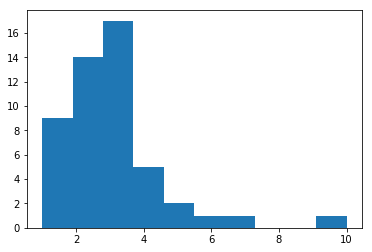

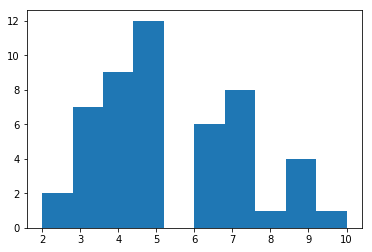

In [9]:
import matplotlib.pyplot as plt

plt.hist(weight_lost_a)
plt.show()
plt.hist(weight_lost_b)
plt.show()

## Choosing the Test statistic

The first step is to decide on a **test statistic**.
A **test statistic** is a numerical value that summarizes the data. 

We will use the difference in the means, also known as the mean difference as the test statistic:

Let's' calculate:
* The mean of the weight lost by participants in group A. 
* The mean of the weight lost by participants in group B. 
* The mean difference

In [10]:
import numpy as np

mean_group_a = np.asarray(weight_lost_a).mean()
mean_group_b = np.asarray(weight_lost_b).mean()
mean_difference = mean_group_b - mean_group_a
print(mean_difference)

2.52


## The Statistical Test

Now that we have a **test statistic**, we need to decide on a **statistical test**. 

The purpose of a **statistical test** is to work out the likelihood that the result we achieved was due to random chance.


The **permutation test** is a **statistical test** that involves simulating rerunning the study many times:

* Randomly reassigning each data point (weight lost) to either group A or group B
* Recalculating the test statistic for each iteration. 

The goal is to calculate a distribution of the **test statistics** (here the mean_difference) over these many iterations. This distribution is called the **sampling distribution**. 


It approximates the full range of possible test statistics under the null hypothesis.


* The null hypothesis is population_mean_group_b - population_mean_group_a = 0
* The alternative hypothesis is population_mean_group_b − population_mean_group_a > 0


Let's create a list named all_values that contains just the weight loss values from our samples of the population

In [11]:
all_values = weight_lost_a
all_values.extend(weight_lost_b)

Let's visualise the sampling distribution for 10000 iterations:

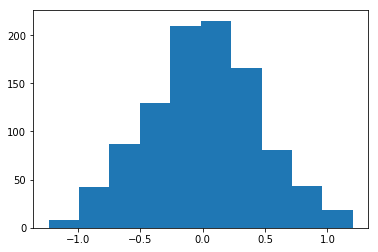

In [25]:
mean_difference = 2.52
mean_differences = []
for i in range(1000):
    group_a=[]
    group_b=[]
    for i in all_values:
        rand = np.random.rand()
        if rand >= 0.5:
            group_a.append(i)
        else:
            group_b.append(i)
    mean_a = np.asarray(group_a).mean()
    mean_b = np.asarray(group_b).mean()
    iteration_mean_difference = mean_b-mean_a
    mean_differences.append(iteration_mean_difference)
plt.hist(mean_differences)
plt.show()

The above histogram represents the the sampling distribution under the null hypothesis. It is very unlikely that the sample mean difference of `2.52` is observed in that case. 

## Calculating the p Value

We can determine the number of times a value of `2.52` or higher appeared in our simulations. If we then divide that frequency by 1000, we'll have the probability of observing a mean difference of 2.52 or higher purely due to random chance.

This probability is called the p value:

* A high p value means that the difference in the amount of weight both groups lost could have easily happened randomly and the weight loss pills probably didn't play a role. 

* A low p value implies that there's an incredibly small probability that the mean difference we observed was because of random chance.

In [26]:
p_value = 0
for k in mean_differences:
    if k >= 2.52:
        p_value += k
p_value = p_value / 1000
print('p_value:', p_value)

p_value: 0.0


The most common p value threshold is 0.05 or 5%, which is what we'll use in this mission. Although .05 is an arbitrary threshold, it means that there's only a 5% chance that the results are due to random chance, which most researchers are comfortable with.

if the p value is less than the threshold, we:

* reject the null hypothesis that there's no difference in mean amount of weight lost by participants in both groups,
*  accept the alternative hypothesis that the people who consumed the weight loss pill lost more weight,
* conclude that the weight loss pill does statistically significantly affect the amount of weight people lost.

Since the p value of 0 is less than the threshold we set of 0.05, we conclude that the difference in weight lost can't be attributed to random chance alone. We therefore reject the null hypothesis and accept the alternative hypothesis. 

We can conclude that the weight loss pill does affect the amount of weight people lost.